# Simulation of Pseudo Events

EOS can simulate pseudo events from any of its built-in PDFs using Markov chain Monte Carlo techniques.
The examples following in this section illustrate how to find a specific PDF from the list of all built-in PDFs,
simulate the pseudo events from this object, compare to the pseudo events with the analytic results,
and plot 1D and 2D histograms of the pseudo events.

In [1]:
import eos
import numpy as np

## Listing the built-in Probability Density Functions

The full list of built-in probability density functions (PDFs) for the most-recent EOS release is available online [here](https://eos.github.io/doc/reference/signal-pdfs.html). You can also show this list using the [eos.SignalPDFs](../reference/python.rst#eos.SignalPDFs) class.

In [2]:
eos.SignalPDFs(prefix='B->Dlnu')

qualified name
Signal PDFs in (semi)leptonic $b$-hadron decays
Signal PDFs in semileptonic $B\to P \ell^-\bar\nu$ decays
""
B->Dlnu::dGamma/dq2
B->Dlnu::d^2Gamma/dq2/dcos(theta_l)


## Setting the Stage

For latter use, we create a dedicated directory to store the pseudo events that we will produce in short order. Similar to the previous chapters, we will store the name of that directory in the global variable ``EOS_BASE_DIRECTORY``:

In [3]:
EOS_BASE_DIRECTORY='./simulation-data'
import os
if not os.path.exists(EOS_BASE_DIRECTORY):
    os.makedirs(EOS_BASE_DIRECTORY)

## Constructing a 1D PDF and Simulating Pseudo Events

We construct the one-dimension PDF describing the decay distribution in the variable $q^2$ and for $\ell=\mu$ leptons. We create the ``q2`` kinematic variable and set it to an arbitrary starting value.
We set boundaries for the phase space from which we want to sample through the kinematic variables ``q2_min`` and ``q2_max``. If needed, we can shrink the phase space to a volume smaller than physically allowed. The normalization of the PDF will automatically adapt.

We simulate ``stride * N=250000`` pseudo events/samples from the PDF, which are thinned down to ``N=50000``.
The Markov chains can self adapt to the PDF in ``preruns=3`` preruns with ``pre_N=1000`` pseudo events/samples each.

In [4]:
mu_kinematics = eos.Kinematics({
    'q2':            2.0,  'q2_min':            0.02,     'q2_max':           11.6,
})
mu_pdf = eos.SignalPDF.make('B->Dlnu::dGamma/dq2', eos.Parameters(), mu_kinematics, eos.Options())
rng = np.random.mtrand.RandomState(74205)
mu_samples, mu_density = mu_pdf.sample_mcmc(N=50000, stride=5, pre_N=1000, preruns=3, rng=rng)
mu_weights = np.ones((len(mu_samples),), dtype=np.float64) / len(mu_samples)
eos.data.ImportanceSamples.create(os.path.join(EOS_BASE_DIRECTORY, 'B-to-Dmunu-1D', 'samples'), [mu_kinematics['q2']], mu_samples, mu_weights, mu_density)

Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Prerun 0 out of 3


Prerun 0: acceptance rate is  87%


Prerun 1 out of 3


Prerun 1: acceptance rate is  39%


Prerun 2 out of 3


Prerun 2: acceptance rate is  32%


Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Main run: acceptance rate is  29%


We repeat the exercise for $\ell=\tau$ leptons, and adapt the phase space accordingly.

In [5]:
tau_kinematics = eos.Kinematics({
    'q2':            4.0,  'q2_min':            3.17,     'q2_max':           11.6,
})
tau_pdf = eos.SignalPDF.make('B->Dlnu::dGamma/dq2', eos.Parameters(), tau_kinematics, eos.Options(l='tau'))
rng = np.random.mtrand.RandomState(74205)
tau_samples, tau_density = tau_pdf.sample_mcmc(N=50000, stride=5, pre_N=1000, preruns=3, rng=rng)
tau_weights = np.ones((len(tau_samples),), dtype=np.float64) / len(tau_samples)
eos.data.ImportanceSamples.create(os.path.join(EOS_BASE_DIRECTORY, 'B-to-Dtaunu-1D', 'samples'), [tau_kinematics['q2']], tau_samples, tau_weights, tau_density)

Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Prerun 0 out of 3


Prerun 0: acceptance rate is  89%


Prerun 1 out of 3


Prerun 1: acceptance rate is  42%


Prerun 2 out of 3


Prerun 2: acceptance rate is  38%


Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Main run: acceptance rate is  29%


## Comparing the 1D PDF samples with the analytic result ##

We can now histogram the samples and compare the histogram with the analytical result.
Similar to observables, [SignalPDF](../reference/python.rst#eos.SignalPDF) objects can be plotted as a function of a single kinematic variable,
while keeping all other kinematic variables fixed. The latter is achieved via the ``kinematics`` key.

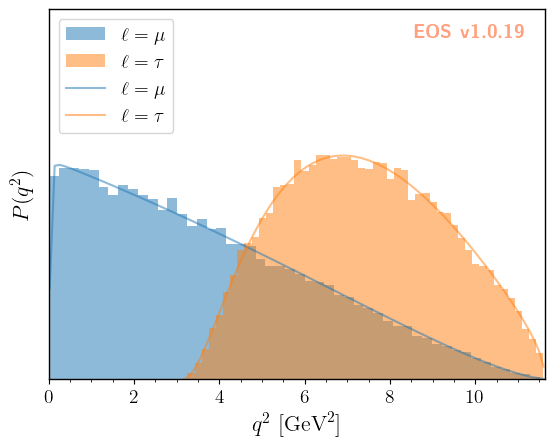

In [6]:
figure_args = """
plot:
  xaxis: { label: '$q^2$', unit: '$\\textnormal{GeV}^2$', range: [0.0, 11.63]                            }
  yaxis: { label: '$P(q^2)$',                             range: [0.0,  0.30], ticks: { visible: false } }
  legend: { position: 'upper left' }
  items:
    - { type: 'histogram1D', label: '$\\ell=\\mu$', color: 'C0',
        variable: 'q2',
        datafile: './simulation-data/B-to-Dmunu-1D/samples'
      }
    - { type: 'histogram1D', label: '$\\ell=\\tau$', color: 'C1',
        variable: 'q2',
        datafile: './simulation-data/B-to-Dtaunu-1D/samples'
      }
    - { type: 'signal-pdf', label: '$\\ell=\\mu$', pdf: 'B->Dlnu::dGamma/dq2;l=mu',
        variable: 'q2', range: [0.02, 11.60],
        kinematics: { q2_min: 0.02, q2_max: 11.60 },
        color: 'C0'
      }
    - { type: 'signal-pdf', label: '$\\ell=\\tau$', pdf: 'B->Dlnu::dGamma/dq2;l=tau',
        variable: 'q2', range: [3.17, 11.60],
        kinematics: { q2_min: 3.17, q2_max: 11.60 },
        color: 'C1'
      }
"""
figure = eos.figure.FigureFactory.from_yaml(figure_args)
figure.draw()

As you can see, we have excellent agreement between our simulations and the respective analytic expressions for the PDFs.

## Constructing a 4D PDF and Simulating Pseudo Events

We can also draw samples for PDFs with more than two kinematic variables. Here, we
use the full four-dimensional PDF for $\bar{B}\to D^*\ell^-\bar\nu$ decays.

We declare and initialize all four kinematic variables (``q2``, ``cos(theta_l)``, ``cos(theta_d)``, and ``phi``),
and provide the phase space boundaries (same names appended with ``_min`` and ``_max``).

We then produce the samples as for the 1D PDF.

In [7]:
dstarlnu_kinematics = eos.Kinematics({
    'q2':            2.0,  'q2_min':            0.02,     'q2_max':           10.5,
    'cos(theta_l)':  0.0,  'cos(theta_l)_min': -1.0,      'cos(theta_l)_max': +1.0,
    'cos(theta_d)':  0.0,  'cos(theta_d)_min': -1.0,      'cos(theta_d)_max': +1.0,
    'phi':           0.3,  'phi_min':           0.0,      'phi_max':           2.0 * np.pi
})
dstarlnu_pdf = eos.SignalPDF.make('B->D^*lnu::d^4Gamma', eos.Parameters(), dstarlnu_kinematics, eos.Options())
rng = np.random.mtrand.RandomState(74205)
dstarlnu_samples, dstarlnu_density = dstarlnu_pdf.sample_mcmc(N=100000, stride=5, pre_N=1000, preruns=3, rng=rng)
dstarlnu_weights = np.ones((len(dstarlnu_samples),), dtype=np.float64) / len(dstarlnu_samples)
dstarlnu_parameters = [
    dstarlnu_kinematics['q2'],
    dstarlnu_kinematics['cos(theta_l)'],
    dstarlnu_kinematics['cos(theta_d)'],
    dstarlnu_kinematics['phi']
]
eos.data.ImportanceSamples.create(os.path.join(EOS_BASE_DIRECTORY, 'B-to-Dlnu-4D', 'samples'), dstarlnu_parameters, dstarlnu_samples, dstarlnu_weights, dstarlnu_density)

Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Prerun 0 out of 3


Prerun 0: acceptance rate is  61%


Prerun 1 out of 3


Prerun 1: acceptance rate is  15%


Prerun 2 out of 3


Prerun 2: acceptance rate is  19%


Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Main run: acceptance rate is  19%


We can now show correlations of the kinematic variables by plotting 2D histograms, beginning with $q^2$ vs $\cos\theta_\ell$, ...

Computing KDE for samples of variables 'q2' and 'cos(theta_l)'


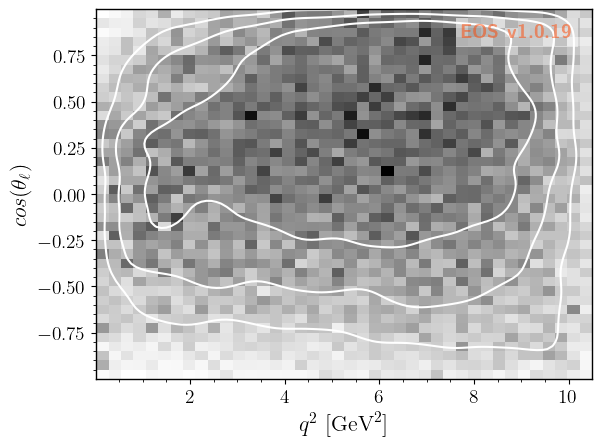

In [8]:
figure_args = """
plot:
  xaxis: { label: '$q^2$', unit: '$\\textnormal{GeV}^2$', range: [0.0, 11.63] }
  yaxis: { label: '$cos(\\theta_\\ell)$',                 range: [-1.0, +1.0] }
  items:
    - { type: 'histogram2D',
        variables: ['q2', 'cos(theta_l)'], bins: 40,
        datafile: './simulation-data/B-to-Dlnu-4D/samples'
      }
    - { type: 'kde2D', color: 'white', alpha: 1.0,
        variables: ['q2', 'cos(theta_l)'],
        levels: [0, 50, 75, 90],
        datafile: './simulation-data/B-to-Dlnu-4D/samples'
      }
"""
figure = eos.figure.FigureFactory.from_yaml(figure_args)
figure.draw()

... over $\cos\theta_\ell$ vs $\cos\theta_D$ ...

Computing KDE for samples of variables 'cos(theta_l)' and 'cos(theta_d)'


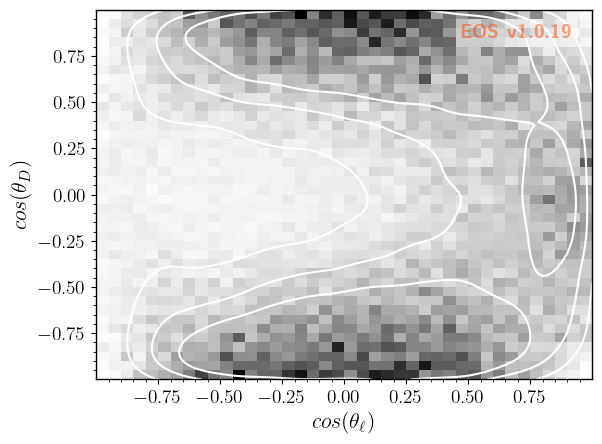

In [9]:
figure_args = """
plot:
  xaxis: { label: '$cos(\\theta_\\ell)$', range: [-1.0, +1.0] }
  yaxis: { label: '$cos(\\theta_D)$',     range: [-1.0, +1.0] }
  items:
    - { type: 'histogram2D',
        variables: ['cos(theta_l)', 'cos(theta_d)'], bins: 40,
        datafile: './simulation-data/B-to-Dlnu-4D/samples'
      }
    - { type: 'kde2D', color: 'white', alpha: 1.0,
        variables: ['cos(theta_l)', 'cos(theta_d)'],
        levels: [0, 50, 75, 90],
        datafile: './simulation-data/B-to-Dlnu-4D/samples'
      }
"""
figure = eos.figure.FigureFactory.from_yaml(figure_args)
figure.draw()

... to $q^2$ vs $\phi$.

Computing KDE for samples of variables 'q2' and 'phi'


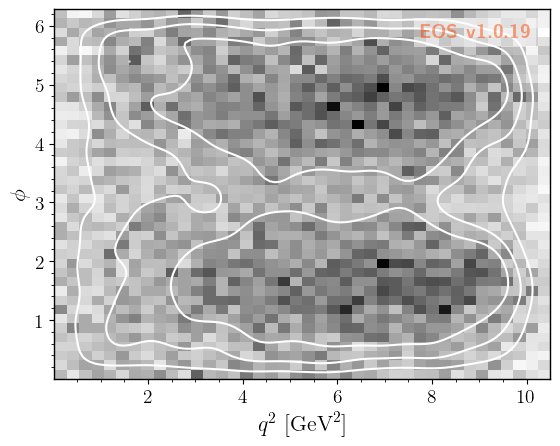

In [10]:
figure_args = """
plot:
  xaxis: { label: '$q^2$', unit: '$\\textnormal{GeV}^2$', range: [0.0, 11.63] }
  yaxis: { label: '$\\phi$',                              range: [0.0, 6.28]  }
  items:
    - { type: 'histogram2D',
        variables: ['q2', 'phi'], bins: 40,
        datafile: './simulation-data/B-to-Dlnu-4D/samples'
      }
    - { type: 'kde2D', color: 'white', alpha: 1.0,
        variables: ['q2', 'phi'],
        levels: [0, 50, 75, 90],
        datafile: './simulation-data/B-to-Dlnu-4D/samples'
      }
"""
figure = eos.figure.FigureFactory.from_yaml(figure_args)
figure.draw()